In [ ]:
!pip install ale-py
!pip install gym[atari]
!pip install neat-python
!pip install autorom[accept-rom-license]
!pip install gym[atari,accept-rom-license]==0.21.0
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.8.1
    Uninstalling ale-py-0.8.1:
      Successfully uninstalled ale-py-0.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 KB 2.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 KB 40.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting req

In [ ]:
import neat
import os
import numpy as np
import gym
from pyvirtualdisplay import Display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import multiprocessing

def jrender(env, step=None, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode= 'rgb_array'))
    if (step!=None):
        info="step:{}|{}".format(step,info)
    plt.title("%s | %s"%(env.spec.id, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.close()
    
# Define a function to evaluate the fitness of each genome in a generation
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        # Create a neural network based on the genome and the given config file
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        # Evaluate the fitness of the genome based on the NN
        genome.fitness = eval_genome(net)

# Define a function to evaluate the fitness of a genome based on the NN
def eval_genome(net):
    #create game environment
    env = gym.make('ALE/Breakout-ram-v5')
    obs = env.reset()
    print("Running genome")
    done=False
    total_reward=0
    while not done:
        # get subset of potentially useful ram to minimise training time
        obs = (obs[[70,71,72,74,80,94,95,93,101,103,105,92]])
        # Convert the observation data into a numpy array of floats
        inputs = np.array(obs, dtype=np.float32)
        # Activate the NN based on the observation data
        outputs = net.activate(inputs)
        # Choose an action based on the outputs of the neural network
        action = np.argmax(outputs)
        # Take the chosen action in the game environment
        obs, reward, done, info = env.step(action)

        total_reward += reward

    # Return the total reward earned by the genome as its fitness score
    return total_reward

# Set the path to the configuration file for the NEAT algorithm
config_path = 'config-feedforward.txt'
# Load the configuration file into a NEAT configuration object
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)
# Create a population of genomes based on the config object
population = neat.Population(config)

# Set the number of generations to run
num_generations = 3
for i in range(num_generations):
    print("Running generation", i)
    # Run the NEAT algorithm on the population for one generation, using the eval_genomes function to evaluate each genome
    population.run(eval_genomes, 1)

# Get the best genome from the final population
best_genome = population.best_genome
# Create a neural network based on the best genome and the given configuration
best_net = neat.nn.FeedForwardNetwork.create(best_genome, config)


/usr/local/lib/python3.9/dist-packages/neat/config.py:175: DeprecationWarning: Using default False for 'no_fitness_termination'
  warnings.warn("Using default {!r} for '{!s}'".format(p.default, p.name),
/usr/local/lib/python3.9/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'false' for 'single_structural_mutation'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.9/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'default' for 'structural_mutation_surer'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.9/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'bias_init_type'
  warnings.warn("Using default {!r} for '{!s}'".format(self.default, self.name),
/usr/local/lib/python3.9/dist-packages/neat/config.py:56: DeprecationWarning: Using default 'gaussian' for 'response_init_type'
  warnings.warn("Using default {!r}

Running generation 0


/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running generation 1
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running generation 2
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome
Running genome


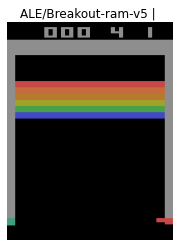

2


In [ ]:
#runs environment like usual with trained NN
env = gym.make('ALE/Breakout-ram-v5')
obs = env.reset()
while True:
    env.step
    obs = obs[95:105]
    inputs = np.array(obs, dtype=np.float32)
    outputs = best_net.activate(inputs)
    action = np.argmax(outputs)
    print(action)
    obs, reward, done, info = env.step(action)

    if done:
        obs = env.reset()
    jrender(env)